# Project 4: Wrangling and Analyzing WeRateDog Tweets Archive.

In [1]:
# Import Required Packages
import pandas as pd
import requests
import json
import tweepy
import timeit
from tweepy import OAuthHandler
from timeit import default_timer as timer
import re

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Load the twitter_archive_enhanced.csv file into a dataframe
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Using pandas request library to download the tweet image predictions file
image_predictions_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(image_predictions_url)

In [4]:
# Confirm the request worked
response

<Response [200]>

In [5]:
# Save file with the extension that was attached to it's url
with open('image_predictions.tsv','wb') as file:
    file.write(response.content)

In [6]:
# Load the image predictions file into a dataframe
df_image = pd.read_csv('image_predictions.tsv',sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
# Obtaining API object to access Twitter API with twitter api secret keys
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [8]:
# Confirm api object obtained
api

In [9]:
# View tweet_ids column name in df_archive dataframe
df_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [10]:
# Get a list of the tweet ids
tweet_ids = df_archive['tweet_id'].tolist()

In [11]:
# Getting the tweet Json data for each tweet ID and save as a new line in a text file named "tweet_json.txt"
serial_number = 0
declined_dict = {}
start = timer()
with open ('tweet_json.txt', 'w') as f:
    for tweet_id in tweet_ids:
        serial_number += 1
        print(str(serial_number) + ':' + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print('Passed')
            json.dump(tweet._json, f)
            f.write('\n')
        except tweepy.errors.TweepyException as e:
            print('Declined')
            declined_dict['tweet_id'] = e
            pass
end = timer()
print(end - start)
print(declined_dict)

1:892420643555336193
Passed
2:892177421306343426
Passed
3:891815181378084864
Passed
4:891689557279858688
Passed
5:891327558926688256
Passed
6:891087950875897856
Passed
7:890971913173991426
Passed
8:890729181411237888
Passed
9:890609185150312448
Passed
10:890240255349198849
Passed
11:890006608113172480
Passed
12:889880896479866881
Passed
13:889665388333682689
Passed
14:889638837579907072
Passed
15:889531135344209921
Passed
16:889278841981685760
Passed
17:888917238123831296
Passed
18:888804989199671297
Passed
19:888554962724278272
Passed
20:888202515573088257
Declined
21:888078434458587136
Passed
22:887705289381826560
Passed
23:887517139158093824
Passed
24:887473957103951883
Passed
25:887343217045368832
Passed
26:887101392804085760
Passed
27:886983233522544640
Passed
28:886736880519319552
Passed
29:886680336477933568
Passed
30:886366144734445568
Passed
31:886267009285017600
Passed
32:886258384151887873
Passed
33:886054160059072513
Passed
34:885984800019947520
Passed
35:885528943205470208

Passed
277:840632337062862849
Passed
278:840370681858686976
Passed
279:840268004936019968
Passed
280:839990271299457024
Passed
281:839549326359670784
Passed
282:839290600511926273
Passed
283:839239871831150596
Passed
284:838952994649550848
Passed
285:838921590096166913
Passed
286:838916489579200512
Passed
287:838831947270979586
Passed
288:838561493054533637
Passed
289:838476387338051585
Passed
290:838201503651401729
Passed
291:838150277551247360
Passed
292:838085839343206401
Passed
293:838083903487373313
Passed
294:837820167694528512
Passed
295:837482249356513284
Passed
296:837471256429613056
Passed
297:837366284874571778
Declined
298:837110210464448512
Passed
299:837012587749474308
Declined
300:836989968035819520
Passed
301:836753516572119041
Passed
302:836677758902222849
Passed
303:836648853927522308
Passed
304:836397794269200385
Passed
305:836380477523124226
Passed
306:836260088725786625
Passed
307:836001077879255040
Passed
308:835685285446955009
Passed
309:835574547218894849
Passed

Passed
550:805207613751304193
Passed
551:804738756058218496
Passed
552:804475857670639616
Passed
553:804413760345620481
Passed
554:804026241225523202
Passed
555:803773340896923648
Passed
556:803692223237865472
Passed
557:803638050916102144
Passed
558:803380650405482500
Passed
559:803321560782307329
Passed
560:803276597545603072
Passed
561:802952499103731712
Passed
562:802624713319034886
Passed
563:802600418706604034
Passed
564:802572683846291456
Passed
565:802323869084381190
Passed
566:802265048156610565
Passed
567:802247111496568832
Declined
568:802239329049477120
Passed
569:802185808107208704
Passed
570:801958328846974976
Passed
571:801854953262350336
Passed
572:801538201127157760
Passed
573:801285448605831168
Passed
574:801167903437357056
Passed
575:801127390143516673
Passed
576:801115127852503040
Passed
577:800859414831898624
Passed
578:800855607700029440
Passed
579:800751577355128832
Passed
580:800513324630806528
Passed
581:800459316964663297
Passed
582:800443802682937345
Passed
5

Passed
823:770093767776997377
Passed
824:770069151037685760
Passed
825:769940425801170949
Passed
826:769695466921623552
Passed
827:769335591808995329
Passed
828:769212283578875904
Passed
829:768970937022709760
Passed
830:768909767477751808
Passed
831:768855141948723200
Passed
832:768609597686943744
Passed
833:768596291618299904
Passed
834:768554158521745409
Passed
835:768473857036525572
Passed
836:768193404517830656
Passed
837:767884188863397888
Passed
838:767754930266464257
Passed
839:767500508068192258
Passed
840:767191397493538821
Passed
841:767122157629476866
Passed
842:766864461642756096
Declined
843:766793450729734144
Passed
844:766714921925144576
Passed
845:766693177336135680
Passed
846:766423258543644672
Passed
847:766313316352462849
Passed
848:766078092750233600
Passed
849:766069199026450432
Passed
850:766008592277377025
Passed
851:765719909049503744
Passed
852:765669560888528897
Passed
853:765395769549590528
Passed
854:765371061932261376
Passed
855:765222098633691136
Passed
8

Passed
1093:737322739594330112
Passed
1094:737310737551491075
Passed
1095:736736130620620800
Passed
1096:736392552031657984
Passed
1097:736365877722001409
Passed
1098:736225175608430592
Passed
1099:736010884653420544
Passed
1100:735991953473572864
Passed
1101:735648611367784448
Passed
1102:735635087207878657
Passed
1103:735274964362878976
Passed
1104:735256018284875776
Passed
1105:735137028879360001
Passed
1106:734912297295085568
Passed
1107:734787690684657664
Passed
1108:734776360183431168
Passed
1109:734559631394082816
Passed
1110:733828123016450049
Passed
1111:733822306246479872
Passed
1112:733482008106668032
Passed
1113:733460102733135873
Passed
1114:733109485275860992
Passed
1115:732732193018155009
Passed
1116:732726085725589504
Passed
1117:732585889486888962
Passed
1118:732375214819057664
Passed
1119:732005617171337216
Passed
1120:731285275100512256
Passed
1121:731156023742988288
Passed
1122:730924654643314689
Passed
1123:730573383004487680
Passed
1124:730427201120833536
Passed
1

Passed
1358:703407252292673536
Passed
1359:703382836347330562
Passed
1360:703356393781329922
Passed
1361:703268521220972544
Passed
1362:703079050210877440
Passed
1363:703041949650034688
Passed
1364:702932127499816960
Passed
1365:702899151802126337
Passed
1366:702684942141153280
Passed
1367:702671118226825216
Passed
1368:702598099714314240
Passed
1369:702539513671897089
Passed
1370:702332542343577600
Passed
1371:702321140488925184
Passed
1372:702276748847800320
Passed
1373:702217446468493312
Passed
1374:701981390485725185
Passed
1375:701952816642965504
Passed
1376:701889187134500865
Passed
1377:701805642395348998
Passed
1378:701601587219795968
Passed
1379:701570477911896070
Passed
1380:701545186879471618
Passed
1381:701214700881756160
Passed
1382:700890391244103680
Passed
1383:700864154249383937
Passed
1384:700847567345688576
Passed
1385:700796979434098688
Passed
1386:700747788515020802
Passed
1387:700518061187723268
Passed
1388:700505138482569216
Passed
1389:700462010979500032
Passed
1

Passed
1623:684914660081053696
Passed
1624:684902183876321280
Passed
1625:684880619965411328
Passed
1626:684830982659280897
Passed
1627:684800227459624960
Passed
1628:684594889858887680
Passed
1629:684588130326986752
Passed
1630:684567543613382656
Passed
1631:684538444857667585
Passed
1632:684481074559381504
Passed
1633:684460069371654144
Passed
1634:684241637099323392
Passed
1635:684225744407494656
Passed
1636:684222868335505415
Passed
1637:684200372118904832
Passed
1638:684195085588783105
Passed
1639:684188786104872960
Passed
1640:684177701129875456
Passed
1641:684147889187209216
Passed
1642:684122891630342144
Passed
1643:684097758874210310
Passed
1644:683857920510050305
Passed
1645:683852578183077888
Passed
1646:683849932751646720
Passed
1647:683834909291606017
Passed
1648:683828599284170753
Passed
1649:683773439333797890
Passed
1650:683742671509258241
Passed
1651:683515932363329536
Passed
1652:683498322573824003
Passed
1653:683481228088049664
Passed
1654:683462770029932544
Passed
1

Passed
1888:674788554665512960
Passed
1889:674781762103414784
Passed
1890:674774481756377088
Passed
1891:674767892831932416
Passed
1892:674764817387900928
Passed
1893:674754018082705410
Passed
1894:674752233200820224
Passed
1895:674743008475090944
Passed
1896:674742531037511680
Passed
1897:674739953134403584
Passed
1898:674737130913071104
Passed
1899:674690135443775488
Passed
1900:674670581682434048
Passed
1901:674664755118911488
Passed
1902:674646392044941312
Passed
1903:674644256330530816
Passed
1904:674638615994089473
Passed
1905:674632714662858753
Passed
1906:674606911342424069
Passed
1907:674468880899788800
Passed
1908:674447403907457024
Passed
1909:674436901579923456
Passed
1910:674422304705744896
Passed
1911:674416750885273600
Passed
1912:674410619106390016
Passed
1913:674394782723014656
Passed
1914:674372068062928900
Passed
1915:674330906434379776
Passed
1916:674318007229923329
Passed
1917:674307341513269249
Passed
1918:674291837063053312
Passed
1919:674271431610523648
Passed
1

Passed
2153:669680153564442624
Passed
2154:669661792646373376
Passed
2155:669625907762618368
Passed
2156:669603084620980224
Passed
2157:669597912108789760
Passed
2158:669583744538451968
Passed
2159:669573570759163904
Passed
2160:669571471778410496
Passed
2161:669567591774625800
Passed
2162:669564461267722241
Passed
2163:669393256313184256
Passed
2164:669375718304980992
Passed
2165:669371483794317312
Passed
2166:669367896104181761
Passed
2167:669363888236994561
Passed
2168:669359674819481600
Passed
2169:669354382627049472
Passed
2170:669353438988365824
Passed
2171:669351434509529089
Passed
2172:669328503091937280
Passed
2173:669327207240699904
Passed
2174:669324657376567296
Passed
2175:669216679721873412
Passed
2176:669214165781868544
Passed
2177:669203728096960512
Passed
2178:669037058363662336
Passed
2179:669015743032369152
Passed
2180:669006782128353280
Passed
2181:669000397445533696
Passed
2182:668994913074286592
Passed
2183:668992363537309700
Passed
2184:668989615043424256
Passed
2

In [12]:
# Convert the text_json.txt file to a json file.
tweet_data = []
with open ('tweet_json.txt') as file:
    for line in file:
        tweet_data.append(json.loads(line))

In [13]:
# Extract needed data into a list of dictionaries
data_tweets = []
for tweet in tweet_data:
    tweet_id = tweet['id']
    retweet_counts = tweet['retweet_count']
    favorite_counts = tweet['favorite_count']
    
    data_tweets.append({'tweet_id': tweet_id,
                       'retweet_counts': retweet_counts,
                       'favorite_counts': favorite_counts})

In [14]:
# Convert the list of Dictionaries into a DataFrame
df_tweet_counts = pd.DataFrame(data_tweets, columns=['tweet_id','retweet_counts','favorite_counts'])

### View all three data frames below

In [15]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
df_tweet_counts.head()

,tweet_id,retweet_counts,favorite_counts
0,892420643555336193,7044,33897
1,892177421306343426,5320,29393
2,891815181378084864,3499,22107
3,891689557279858688,7254,37013
4,891327558926688256,7795,35397


## Assessing Data

In [18]:
# Data was viewed in spread sheet for visual accessing

In [19]:
# Data accessed programatically
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
df_tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2327 non-null   int64
 1   retweet_counts   2327 non-null   int64
 2   favorite_counts  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [22]:
# Checking for duplicates in the 
df_archive.duplicated().sum()

0

In [23]:
df_archive.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
946,752568224206688256,NaN,NaN,2016-07-11 18:20:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here are three doggos completely misjudging an...,NaN,NaN,NaN,https://vine.co/v/5W0bdhEUUVT,9,10,None,None,None,None,None
569,801958328846974976,NaN,NaN,2016-11-25 01:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ronnie. He hopes you're having a great...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801958328...,12,10,Ronnie,None,None,None,None
1937,673919437611909120,NaN,NaN,2015-12-07 17:38:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Obie. He is on guard watching for evil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673919437...,11,10,Obie,None,None,pupper,None
450,818646164899774465,NaN,NaN,2017-01-10 02:30:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Seamus. He's very bad a...,8.083449e+17,4.196984e+09,2016-12-12 16:16:49 +0000,"https://vine.co/v/5QWd3LZqXxd,https://vine.co/...",11,10,Seamus,None,None,None,None
1303,707420581654872064,NaN,NaN,2016-03-09 04:19:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keurig. He's a rare dog. Laughs like a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707420581...,4,10,Keurig,None,None,None,None
1312,707014260413456384,NaN,NaN,2016-03-08 01:25:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ellie. She requests to be carried arou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707014260...,11,10,Ellie,None,None,None,None
1318,706538006853918722,NaN,NaN,2016-03-06 17:52:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Oliver (pronounced ""Ricardo""). He's a ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/706538006...,11,10,Oliver,None,None,None,None
1606,685667379192414208,NaN,NaN,2016-01-09 03:40:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marty. He has no idea what happened he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685667379...,9,10,Marty,None,None,pupper,None
1128,729823566028484608,NaN,NaN,2016-05-10 00:01:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stefan. He's a downright remarkable pu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/729823566...,13,10,Stefan,None,None,None,None
1768,678389028614488064,NaN,NaN,2015-12-20 01:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She just learned that her final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678389028...,11,10,Bella,None,None,pupper,None


In [24]:
df_image.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
272,670826280409919488,https://pbs.twimg.com/media/CU9A8ZuWsAAt_S1.jpg,1,scorpion,0.927956,False,tarantula,0.021631,False,wolf_spider,0.014837,False
699,684594889858887680,https://pbs.twimg.com/media/CYAra7JWsAACPZH.jpg,1,Weimaraner,0.948688,True,English_setter,0.035352,True,Brittany_spaniel,0.003879,True
268,670811965569282048,https://pbs.twimg.com/media/CU8z65IUEAQBc4q.jpg,1,basset,0.994090,True,Walker_hound,0.003973,True,beagle,0.001406,True
13,666082916733198337,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,1,pug,0.489814,True,bull_mastiff,0.404722,True,French_bulldog,0.048960,True
1954,864197398364647424,https://pbs.twimg.com/media/C_4-8iPV0AA1Twg.jpg,4,golden_retriever,0.945905,True,Labrador_retriever,0.021264,True,Tibetan_mastiff,0.020493,True
266,670804601705242624,https://pbs.twimg.com/media/CU8tOJZWUAAlNoF.jpg,1,Pomeranian,0.868560,True,Pekinese,0.090129,True,chow,0.021722,True
75,667405339315146752,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True
1570,794926597468000259,https://pbs.twimg.com/media/CwglhZVXgAAc3_w.jpg,1,teddy,0.569566,False,bath_towel,0.173745,False,toy_poodle,0.037662,True
81,667470559035432960,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,toy_poodle,0.304175,True,pug,0.223427,True,Lakeland_terrier,0.073316,True
65,667174963120574464,https://pbs.twimg.com/media/CUJIFoJWsAAL3Dc.jpg,1,toy_poodle,0.266437,True,Chihuahua,0.243223,True,bluetick,0.072806,True


In [25]:
df_tweet_counts.sample(15)

,tweet_id,retweet_counts,favorite_counts
2136,669367896104181761,132,408
1996,671882082306625538,1224,3119
1839,675166823650848770,1390,3185
67,879130579576475649,5766,0
15,889278841981685760,4463,22173
800,769940425801170949,8873,29373
1093,730924654643314689,1801,5670
742,778027034220126208,1498,6208
1230,710283270106132480,485,2007
777,772826264096874500,2224,7592


In [26]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [27]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
df_tweet_counts.describe()

,tweet_id,retweet_counts,favorite_counts
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2482.954878,7071.516975
std,6.820795e+16,4204.121844,10988.575102
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,498.000000,1227.500000
50%,7.178418e+17,1154.000000,3054.000000
75%,7.986547e+17,2877.000000,8626.500000
max,8.924206e+17,71049.000000,145248.000000


### Quality issues
-Twitter archive table

1. Retweets of the tweet archive are present in the data set which are not needed.

2. Missing values in in_reply_to_status_id, in_reply_to_user_id, status_id, retweeted_status_id.

3. Missing values in  retweeted_status_user_id, expanded_urls column, reteweeted_status_timestamp columns.

4. Incorrrect dog rating numerator value.

5. Incorrect dog rating denomenator value.

6. Timestamp column is rendered as object data type.

7. Inappropirate column title for the name column in twitter archive table and invalid names in the column ('a', 'an', 'the','O').

8. Unwanted columns for analysis present in the image predictions dataframe. Seperate dataframes for analysis.

### Tidiness issues

1. Not all tweets in the twitter_archive dataframe have image predictions in the image predictions dataframe and tweet/favourites count in the tweet counts dataframe.

2. Not all tweets in the tweet_counts dataframe have image predictions in the image predictions dataframe.

3. There are multiple dog stages columns present, doggo, pupper, floofer and puppo. They should be merged into 1 column.

4. Data sets of the same observational unit sepearated into 3 data sets.

## Cleaning Data

In [29]:
# Make copies of original pieces of data
archive_clean = df_archive.copy()
image_clean = df_image.copy()
counts_clean = df_tweet_counts.copy()

## Quality Issues

### Issue #1, #2 and #3: Retweets of the tweet archive are present in the data set which are not needed and Missing values in in_reply_to_status_id, in_reply_to_user_id, status_id, retweeted_status_id, retweeted_status_user_id, reteweeted_status_timestamp columns.

#### Define: Drop all the retweeted columns and rows instead of replacing their missing values because the would not be needed. Also use the opportunity to drop other unwanted columns in the twiiter archive dataframe,

#### Code

In [30]:
#Drop retweeted rows using the retweeed id column
# Select rows to be dropped first
selected_rows = archive_clean[~archive_clean['retweeted_status_id'].isnull()]

In [31]:
#View Selected rows
selected_rows

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [32]:
#Drop rows by index of selected rows
archive_clean.drop(selected_rows.index,inplace=True)

In [33]:
# Check rows have been dropped
archive_clean[~archive_clean['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [34]:
# Convert the archive dataframe column to pandas series to note index of columns to be dropped
pd.Series(archive_clean.columns.to_list())

0                       tweet_id
1          in_reply_to_status_id
2            in_reply_to_user_id
3                      timestamp
4                         source
5                           text
6            retweeted_status_id
7       retweeted_status_user_id
8     retweeted_status_timestamp
9                  expanded_urls
10              rating_numerator
11            rating_denominator
12                          name
13                         doggo
14                       floofer
15                        pupper
16                         puppo
dtype: object

In [35]:
# Drop columns by column index
archive_clean.drop(archive_clean.columns[[1,2,4,6,7,8,9]],axis=1,inplace=True)

#### Test

In [36]:
# Checking that the right columns have been dropped
archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #4 and #5: Incorrrect dog rating numerator value and Incorrect dog rating denomenator value.

#### Define: Extract new columns for the rating numerator and denominator and drop original ones

#### Code

In [37]:
# Extract the rate numerator and denominator from the archive_clean data frame
top =[]
bottom = []
for word in archive_clean['text'].tolist():
    pattern = '\d\d/\d\d'
    rate = re.findall(pattern,word)
    if len(rate) >= 1:
        rate1 = rate[0].split('/')
        top.append(rate1[0])
        bottom.append(rate1[1])
    else:
        top.append('Nil')
        bottom.append('Nil')

In [38]:
#Drop original rate numerator and denominator columns,then create new columns for rate numerator and denominator
archive_clean.drop(['rating_numerator','rating_denominator'],axis=1,inplace=True)
archive_clean['rate_numerator'] = top
archive_clean['rate_denominator'] = bottom

#### Test

In [39]:
# Check new columns have been created
archive_clean.head()

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,rate_numerator,rate_denominator
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,13,10
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,13,10
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None,12,10
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None,13,10
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None,12,10


### Issue #6: Timestamp column is rendered as object data type.

#### Define: Convert time stamp from object data type to date time data type

#### Code

In [40]:
# Convert timestamp column to 
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [41]:
# Confirm data type has been changed to date time
archive_clean['timestamp'].dtype

datetime64[ns, UTC]

### Issue #7: Inappropirate column title for the name column in twitter archive table and invalid names in the column ('a', 'an', 'the','O')

#### Define: Change the name of the column from "name" to "dog_name" and remove all rows with invalid dog names.

#### Code

In [42]:
# Renaming the column appropriately
archive_clean.rename(columns = {'name': 'dog_name'},inplace=True)

#### Test

In [43]:
#Check the column has been renamed
archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'dog_name', 'doggo', 'floofer',
       'pupper', 'puppo', 'rate_numerator', 'rate_denominator'],
      dtype='object')

In [44]:
# Extract all columns with invalid dog name
count = 0
invalid_name_list = ['a','an','the','O']
for name in archive_clean['dog_name'].tolist():
    if name in invalid_name_list:
        if count == 0:
            invalid_names = archive_clean[archive_clean['dog_name'] == name]
            count+=1
        else:
            invalid_names2 = archive_clean[archive_clean['dog_name'] == name]
            invalid_names = invalid_names.append(invalid_names2)

In [45]:
invalid_names

,tweet_id,timestamp,text,dog_name,doggo,floofer,pupper,puppo,rate_numerator,rate_denominator
56,881536004380872706,2017-07-02 15:32:16+00:00,Here is a pupper approaching maximum borkdrive...,a,None,None,pupper,None,14,10
649,792913359805018113,2016-10-31 02:17:31+00:00,Here is a perfect example of someone who has t...,a,None,None,None,None,13,10
801,772581559778025472,2016-09-04 23:46:12+00:00,Guys this is getting so out of hand. We only r...,a,None,None,None,None,10,10
1002,747885874273214464,2016-06-28 20:14:22+00:00,This is a mighty rare blue-tailed hammer sherk...,a,None,None,None,None,Nil,Nil
1004,747816857231626240,2016-06-28 15:40:07+00:00,Viewer discretion is advised. This is a terrib...,a,None,None,None,None,Nil,Nil
...,...,...,...,...,...,...,...,...,...,...
2348,666055525042405380,2015-11-16 00:49:46+00:00,Here is a Siberian heavily armored polar bear ...,a,None,None,None,None,10,10
2350,666050758794694657,2015-11-16 00:30:50+00:00,This is a truly beautiful English Wilson Staff...,a,None,None,None,None,10,10
2352,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,a,None,None,None,None,Nil,Nil
2353,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,a,None,None,None,None,Nil,Nil


In [46]:
invalid_names.duplicated().sum()

3056

In [47]:
invalid_names.drop_duplicates(inplace=True)

In [48]:
invalid_names['dog_name'].value_counts()

a      55
the     8
an      6
O       1
Name: dog_name, dtype: int64

In [49]:
# Drop rows with invalid names from the archive data frame
archive_clean.drop(invalid_names.index,inplace=True)

### Issue #8: Unwanted columns for analysis present in the twitter archive dataframe and image predictions dataframe.

#### Define: Drop uwanted columns on the image predictions data frame.

#### Code

In [50]:
# Convert the image dataframe column to pandas series to note index of columns to be dropped
pd.Series(image_clean.columns.to_list())

0     tweet_id
1      jpg_url
2      img_num
3           p1
4      p1_conf
5       p1_dog
6           p2
7      p2_conf
8       p2_dog
9           p3
10     p3_conf
11      p3_dog
dtype: object

In [51]:
# Drop columns by column index
image_clean.drop(image_clean.columns[[4,7,10]],axis=1,inplace=True)

#### Test

In [52]:
# Check columns are dropped success fully dropped 
image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_dog', 'p2', 'p2_dog', 'p3',
       'p3_dog'],
      dtype='object')

In [53]:
archive_clean.shape

(2105, 10)

### Tidiness Issues

### Issue #1: Not all tweets in the twitter_archive dataframe have image predictions in the image predictions dataframe and tweet/favourites count in the tweet counts dataframe.

#### Define: Drop all tweet id rows in twitter archive dataframe that do not have image predictions in the image predictions data frame and tweet/favourite counts in the tweet counts dataframe.

#### Code

In [54]:
# Get a list of all tweet ids in the image predictions dataframe.
id_list = image_clean['tweet_id'].tolist()

In [55]:
# Extract all the tweet ids without image predictions to a data frame
count = 0
for tweet in archive_clean['tweet_id'].tolist():
    if tweet not in id_list:
        if count == 0:
            no_image1 = archive_clean[archive_clean['tweet_id'] == tweet]
            count+=1
        else:
            no_image2 = archive_clean[archive_clean['tweet_id'] == tweet]
            no_image1 = no_image1.append(no_image2)

In [56]:
# View the rows to be dropped
no_image1

,tweet_id,timestamp,text,dog_name,doggo,floofer,pupper,puppo,rate_numerator,rate_denominator
30,886267009285017600,2017-07-15 16:51:35+00:00,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,None,None,None,None,None,12,10
35,885518971528720385,2017-07-13 15:19:09+00:00,I have a new hero and his name is Howard. 14/1...,None,None,None,None,None,14,10
42,884247878851493888,2017-07-10 03:08:17+00:00,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,None,None,None,None,None,13,10
55,881633300179243008,2017-07-02 21:58:53+00:00,@roushfenway These are good dogs but 17/10 is ...,None,None,None,None,None,17,10
64,879674319642796034,2017-06-27 12:14:36+00:00,@RealKentMurphy 14/10 confirmed,None,None,None,None,None,14,10
...,...,...,...,...,...,...,...,...,...,...
1940,673716320723169284,2015-12-07 04:11:02+00:00,The millennials have spoken and we've decided ...,None,None,None,None,None,Nil,Nil
2038,671550332464455680,2015-12-01 04:44:10+00:00,After 22 minutes of careful deliberation this ...,None,None,None,None,None,Nil,Nil
2149,669684865554620416,2015-11-26 01:11:28+00:00,After countless hours of research and hundreds...,None,None,None,None,None,11,10
2189,668967877119254528,2015-11-24 01:42:25+00:00,12/10 good shit Bubka\n@wane15,None,None,None,None,None,12,10


In [57]:
# Get a list of all tweet ids in tweet counts dataframe.
id_list2 = counts_clean['tweet_id'].tolist()

In [58]:
# Extract all the tweet ids without tweet or favorites count to a data frame
count = 0
for tweet in archive_clean['tweet_id'].tolist():
    if tweet not in id_list2:
        if count == 0:
            no_count1 = archive_clean[archive_clean['tweet_id'] == tweet]
            count+=1
        else:
            no_count2 = archive_clean[archive_clean['tweet_id'] == tweet]
            no_count1 = no_count1.append(no_count2)

In [59]:
# View the rows to be dropped
no_count1

,tweet_id,timestamp,text,dog_name,doggo,floofer,pupper,puppo,rate_numerator,rate_denominator
104,872261713294495745,2017-06-07 01:19:32+00:00,This is Harry. His ears are activated one at a...,Harry,None,None,None,None,13,10
253,844704788403113984,2017-03-23 00:18:10+00:00,This is Luna. It's her first time outside and ...,Luna,None,None,None,None,13,10
296,837366284874571778,2017-03-02 18:17:34+00:00,This is Lucy. She has a portrait of herself on...,Lucy,None,None,None,None,13,10
363,829374341691346946,2017-02-08 17:00:26+00:00,This is Astrid. She's a guide doggo in trainin...,Astrid,doggo,None,None,None,13,10
750,779123168116150273,2016-09-23 01:00:13+00:00,This is Reggie. He hugs everyone he meets. 12/...,Reggie,None,None,None,None,12,10
887,759923798737051648,2016-08-01 01:28:46+00:00,We only rate dogs... this is a Taiwanese Guide...,None,None,None,None,None,10,10
932,754011816964026368,2016-07-15 17:56:40+00:00,This is Charlie. He pouts until he gets to go ...,Charlie,None,None,None,None,12,10
1726,680055455951884288,2015-12-24 16:00:30+00:00,"Meet Sammy. At first I was like ""that's a snow...",Sammy,None,None,None,None,10,10


In [60]:
no_count1.shape

(8, 10)

In [61]:
# Join the two data frames together
no_count_and_image = no_image1.append(no_count1)

In [62]:
# Check for Duplicates
no_count_and_image.duplicated().sum()

0

In [63]:
# Drop the rows from the the twitter archive dataframe by using the index of the no count and image dataframe
archive_clean.drop(no_count_and_image.index,inplace=True)

#### Test

In [64]:
# Confirm rows have been dropped
archive_clean.shape

(1917, 10)

### Issue #2: Not all tweets in in the tweet_counts dataframe have image predictions in the image predictions dataframe.

#### Define: Drop all rows in tweet counts dataframe that do not have image predictions in the image predictions dataframe.

#### Code

In [65]:
# Get a list of all tweet ids in tweet counts dataframe.
id_list3 = image_clean['tweet_id'].tolist()

In [66]:
count = 0
for tweet in counts_clean['tweet_id'].to_list():
    if tweet not in id_list3:
        if count == 0:
            no_image = counts_clean[counts_clean['tweet_id'] == tweet]
            count+=1
        else:
            no_image1 = counts_clean[counts_clean['tweet_id'] == tweet]
            no_image = no_image.append(no_image1)

In [67]:
counts_clean.drop(no_image.index,inplace=True)

#### Test

In [68]:
#Check if rows have been dropped
counts_clean.shape

(2057, 3)

### Issue #3: There are multiple dog stages columns present, doggo, pupper, floofer and puppo. They should be merged into 1 column.

#### Define: Merge the four columns into a single column and account for tweets with multiple dog stages.

#### Code

In [69]:
# Extract rows with multiple dog stages
mul_stages = archive_clean.loc[(archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]

In [70]:
# view the frame with multiple stages
mul_stages

,tweet_id,timestamp,text,dog_name,doggo,floofer,pupper,puppo,rate_numerator,rate_denominator
191,855851453814013952,2017-04-22 18:31:02+00:00,Here's a puppo participating in the #ScienceMa...,None,doggo,None,None,puppo,13,10
200,854010172552949760,2017-04-17 16:34:26+00:00,"At first I thought this was a shy doggo, but i...",None,doggo,floofer,None,None,11,10
460,817777686764523521,2017-01-07 16:59:28+00:00,"This is Dido. She's playing the lead role in ""...",Dido,doggo,None,pupper,None,13,10
531,808106460588765185,2016-12-12 00:29:28+00:00,Here we have Burke (pupper) and Dexter (doggo)...,None,doggo,None,pupper,None,12,10
565,802265048156610565,2016-11-25 21:37:47+00:00,"Like doggo, like pupper version 2. Both 11/10 ...",None,doggo,None,pupper,None,11,10
575,801115127852503040,2016-11-22 17:28:25+00:00,This is Bones. He's being haunted by another d...,Bones,doggo,None,pupper,None,12,10
705,785639753186217984,2016-10-11 00:34:48+00:00,This is Pinot. He's a sophisticated doggo. You...,Pinot,doggo,None,pupper,None,10,10
889,759793422261743616,2016-07-31 16:50:42+00:00,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",Maggie,doggo,None,pupper,None,12,10
956,751583847268179968,2016-07-09 01:08:47+00:00,Please stop sending it pictures that don't eve...,None,doggo,None,pupper,None,Nil,Nil
1063,741067306818797568,2016-06-10 00:39:48+00:00,This is just downright precious af. 12/10 for ...,just,doggo,None,pupper,None,12,10


In [71]:
# Join the four columns together and create a new column
mul_stages["dog_stage"] = mul_stages["puppo"] + mul_stages["floofer"] + mul_stages["pupper"] + mul_stages["doggo"]

C:\Users\ZOEY\AppData\Local\Temp/ipykernel_7468/3195277555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mul_stages["dog_stage"] = mul_stages["puppo"] + mul_stages["floofer"] + mul_stages["pupper"] + mul_stages["doggo"]


In [72]:
# View new column that has been created
mul_stages

,tweet_id,timestamp,text,dog_name,doggo,floofer,pupper,puppo,rate_numerator,rate_denominator,dog_stage
191,855851453814013952,2017-04-22 18:31:02+00:00,Here's a puppo participating in the #ScienceMa...,None,doggo,None,None,puppo,13,10,puppoNoneNonedoggo
200,854010172552949760,2017-04-17 16:34:26+00:00,"At first I thought this was a shy doggo, but i...",None,doggo,floofer,None,None,11,10,NoneflooferNonedoggo
460,817777686764523521,2017-01-07 16:59:28+00:00,"This is Dido. She's playing the lead role in ""...",Dido,doggo,None,pupper,None,13,10,NoneNonepupperdoggo
531,808106460588765185,2016-12-12 00:29:28+00:00,Here we have Burke (pupper) and Dexter (doggo)...,None,doggo,None,pupper,None,12,10,NoneNonepupperdoggo
565,802265048156610565,2016-11-25 21:37:47+00:00,"Like doggo, like pupper version 2. Both 11/10 ...",None,doggo,None,pupper,None,11,10,NoneNonepupperdoggo
575,801115127852503040,2016-11-22 17:28:25+00:00,This is Bones. He's being haunted by another d...,Bones,doggo,None,pupper,None,12,10,NoneNonepupperdoggo
705,785639753186217984,2016-10-11 00:34:48+00:00,This is Pinot. He's a sophisticated doggo. You...,Pinot,doggo,None,pupper,None,10,10,NoneNonepupperdoggo
889,759793422261743616,2016-07-31 16:50:42+00:00,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",Maggie,doggo,None,pupper,None,12,10,NoneNonepupperdoggo
956,751583847268179968,2016-07-09 01:08:47+00:00,Please stop sending it pictures that don't eve...,None,doggo,None,pupper,None,Nil,Nil,NoneNonepupperdoggo
1063,741067306818797568,2016-06-10 00:39:48+00:00,This is just downright precious af. 12/10 for ...,just,doggo,None,pupper,None,12,10,NoneNonepupperdoggo


In [73]:
#Replace the values in the dog-stage column with "multiple"
for name in mul_stages['dog_stage'].tolist():
    mul_stages['dog_stage'] = mul_stages['dog_stage'].replace([name],'multiple')

C:\Users\ZOEY\AppData\Local\Temp/ipykernel_7468/3251980592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mul_stages['dog_stage'] = mul_stages['dog_stage'].replace([name],'multiple')


In [74]:
# View modified column
mul_stages['dog_stage']

191     multiple
200     multiple
460     multiple
531     multiple
565     multiple
575     multiple
705     multiple
889     multiple
956     multiple
1063    multiple
1113    multiple
Name: dog_stage, dtype: object

In [75]:
# Drop four columns in mul_stages daframe that  have been collapsed to dog_stage
mul_stages.drop(columns=['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

C:\Users\ZOEY\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [76]:
# Check columns have been dropped
mul_stages.columns

Index(['tweet_id', 'timestamp', 'text', 'dog_name', 'rate_numerator',
       'rate_denominator', 'dog_stage'],
      dtype='object')

In [77]:
# Drop the rows with multiple dog stages from the archive_clean dataframe
archive_clean.drop(mul_stages.index,inplace=True)

In [78]:
# Collapse the pupper, puppo, doggo and floofer dog stages into a new single column and name the column dog_stage
count = 0
dog_stage = []
dog_stage_list = ['doggo', 'floofer', 'pupper', 'puppo']
list_doggo = archive_clean.doggo.tolist()
list_floofer = archive_clean.floofer.tolist()
list_pupper = archive_clean.pupper.tolist()
list_puppo = archive_clean.puppo.tolist()
for tweet in archive_clean.tweet_id.tolist():
    if list_doggo[count] in dog_stage_list:
        dog_stage.append(list_doggo[count])
    elif list_floofer[count] in dog_stage_list:
        dog_stage.append(list_floofer[count])
    elif list_pupper[count] in dog_stage_list:
        dog_stage.append(list_pupper[count])
    elif list_puppo[count] in dog_stage_list:
        dog_stage.append(list_puppo[count])
    else:
        dog_stage.append('None')
    count+=1

In [79]:
# Create a new column called dog_stage
archive_clean['dog_stage'] = dog_stage

In [80]:
# Drop the puppo, pupper, floofer and doggo columns
archive_clean.drop(columns=['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

In [81]:
# Check dog stages columns have been dropped
archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'dog_name', 'rate_numerator',
       'rate_denominator', 'dog_stage'],
      dtype='object')

In [82]:
# Check new column has been created and unwanted column dropped and mutiple stage rows have been appended
archive_clean.head()

,tweet_id,timestamp,text,dog_name,rate_numerator,rate_denominator,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,13,10,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,13,10,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,12,10,None
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,Darla,13,10,None
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,Franklin,12,10,None


In [83]:
# Add the rows with multiple dataframes to the main dataframe
archive_clean = archive_clean.append(mul_stages)

In [84]:
# Check it has been suucefully appended by doing a value count for dog stage column
archive_clean['dog_stage'].value_counts()

None        1618
pupper       197
doggo         62
puppo         22
multiple      11
floofer        7
Name: dog_stage, dtype: int64

### Isuue #4: Data sets of the same observational unit sepearated into 3 data sets.

#### Define: Combine all three data sets into one dataframe.

#### Code

In [85]:
# Merge all three data frames into 1

In [86]:
archive_clean = archive_clean.merge(image_clean, how='right')

In [87]:
archive_clean = archive_clean.merge(counts_clean, how='right')

In [88]:
archive_clean.head()

,tweet_id,timestamp,text,dog_name,rate_numerator,rate_denominator,dog_stage,jpg_url,img_num,p1,p1_dog,p2,p2_dog,p3,p3_dog,retweet_counts,favorite_counts
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,13,10,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,False,bagel,False,banana,False,7044,33897
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,13,10,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,True,Pekinese,True,papillon,True,5320,29393
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,12,10,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,True,malamute,True,kelpie,True,3499,22107
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,Darla,13,10,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,False,Labrador_retriever,True,spatula,False,7254,37013
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,Franklin,12,10,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,True,English_springer,True,German_short-haired_pointer,True,7795,35397


In [89]:
archive_clean.shape

(2057, 17)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [90]:
# Store new data in master data frame
archive_clean.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [91]:
# Load in the new master data in a data frame
df = pd.read_csv('twitter_archive_master.csv')

In [92]:
df.describe()

,tweet_id,img_num,retweet_counts,favorite_counts
count,2.057000e+03,2057.000000,2057.000000,2057.000000
mean,7.377684e+17,1.204181,2374.848323,7462.162859
std,6.756840e+16,0.563240,4151.580673,11291.721167
min,6.660209e+17,1.000000,11.000000,0.000000
25%,6.762374e+17,1.000000,505.000000,1410.000000
50%,7.110080e+17,1.000000,1121.000000,3263.000000
75%,7.928838e+17,1.000000,2736.000000,9299.000000
max,8.924206e+17,4.000000,71049.000000,145248.000000


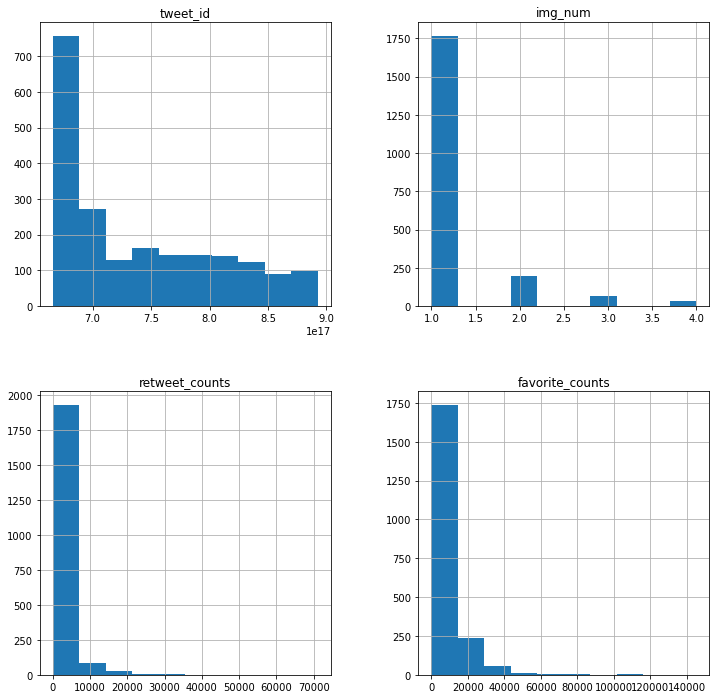

In [93]:
df.hist(figsize=(12,12));

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Insights:
1. Most images that are first image to predict happen to be true.

2. A little over 300 image predictions turned out false for all three predictions.

3. The rating of 12 seems to be the most popular rating.

### Visualization

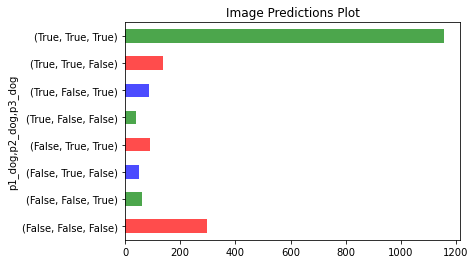

In [95]:
df.groupby(['p1_dog', 'p2_dog', 'p3_dog']).count()['text'].plot(kind='barh',color = ['red','green','blue'], title='Image Predictions Plot', alpha=.7);

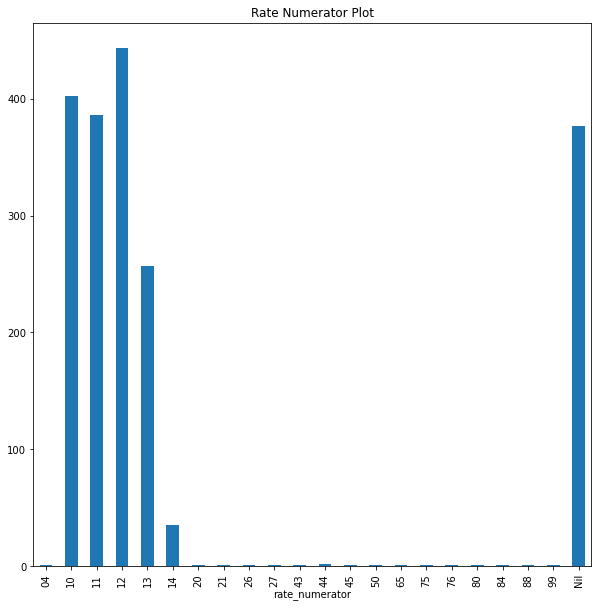

In [96]:
df.groupby('rate_numerator').count()['text'].plot(kind='bar',title='Rate Numerator Plot',figsize=(10,10));